In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.wrappers.scikit_learn import KerasRegressor
%matplotlib inline
dataset = pd.read_csv("C:/Program Files/Weka-3-8/data/projebrazilANN.csv")
dataset.head(2)

,dt,AverageTemperature
0,1850.0801,24.176094
1,1850.0901,24.551096


In [2]:
dataset.describe(include='all')

,dt,AverageTemperature
count,1957.000000,1957.000000
mean,1931.690044,24.763983
std,47.091438,0.955489
min,1850.080100,21.797000
25%,1891.050100,24.152000
50%,1932.020100,24.910471
75%,1972.110100,25.487015
max,2013.080100,27.151025


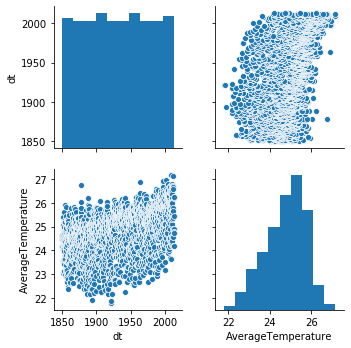

In [3]:
sns.pairplot(dataset)

In [4]:
x=dataset.iloc[:,0:1]
y=dataset.iloc[:,1].values

In [5]:
y=np.reshape(y, (-1,1))
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()
print(scaler_x.fit(x))
xscale=scaler_x.transform(x)
print(scaler_y.fit(y))
yscale=scaler_y.transform(y)

MinMaxScaler(copy=True, feature_range=(0, 1))
MinMaxScaler(copy=True, feature_range=(0, 1))


In [6]:
x_train, x_test, y_train, y_test = train_test_split(xscale, yscale)

In [7]:
model = Sequential()
model.add(Dense(12, input_dim=1, kernel_initializer='normal', activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='linear'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                24        
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 137
Trainable params: 137
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])

In [9]:
history = model.fit(x_train, y_train, epochs=250, batch_size=100,  verbose=1, validation_split=0.2)

Train on 1173 samples, validate on 294 samples
Epoch 1/250
1173/1173 [==============================] - 2s 1ms/sample - loss: 0.3013 - mse: 0.3013 - mae: 0.5208 - val_loss: 0.2546 - val_mse: 0.2546 - val_mae: 0.4717
Epoch 2/250
1173/1173 [==============================] - 0s 65us/sample - loss: 0.2409 - mse: 0.2409 - mae: 0.4603 - val_loss: 0.1957 - val_mse: 0.1957 - val_mae: 0.4062
Epoch 3/250
1173/1173 [==============================] - 0s 66us/sample - loss: 0.1830 - mse: 0.1830 - mae: 0.3942 - val_loss: 0.1454 - val_mse: 0.1454 - val_mae: 0.3428
Epoch 4/250
1173/1173 [==============================] - 0s 66us/sample - loss: 0.1357 - mse: 0.1357 - mae: 0.3323 - val_loss: 0.1055 - val_mse: 0.1055 - val_mae: 0.2871
Epoch 5/250
1173/1173 [==============================] - 0s 65us/sample - loss: 0.0980 - mse: 0.0980 - mae: 0.2774 - val_loss: 0.0753 - val_mse: 0.0753 - val_mae: 0.2387
Epoch 6/250
1173/1173 [==============================] - 0s 64us/sample - loss: 0.0698 - mse: 0.0698 - m

Epoch 49/250
1173/1173 [==============================] - 0s 65us/sample - loss: 0.0265 - mse: 0.0265 - mae: 0.1337 - val_loss: 0.0279 - val_mse: 0.0279 - val_mae: 0.1342
Epoch 50/250
1173/1173 [==============================] - 0s 62us/sample - loss: 0.0265 - mse: 0.0265 - mae: 0.1336 - val_loss: 0.0279 - val_mse: 0.0279 - val_mae: 0.1342
Epoch 51/250
1173/1173 [==============================] - 0s 65us/sample - loss: 0.0265 - mse: 0.0265 - mae: 0.1336 - val_loss: 0.0279 - val_mse: 0.0279 - val_mae: 0.1342
Epoch 52/250
1173/1173 [==============================] - 0s 64us/sample - loss: 0.0265 - mse: 0.0265 - mae: 0.1334 - val_loss: 0.0279 - val_mse: 0.0279 - val_mae: 0.1341
Epoch 53/250
1173/1173 [==============================] - 0s 63us/sample - loss: 0.0265 - mse: 0.0265 - mae: 0.1333 - val_loss: 0.0279 - val_mse: 0.0279 - val_mae: 0.1341
Epoch 54/250
1173/1173 [==============================] - 0s 65us/sample - loss: 0.0265 - mse: 0.0265 - mae: 0.1336 - val_loss: 0.0279 - val_mse:

Epoch 97/250
1173/1173 [==============================] - 0s 65us/sample - loss: 0.0265 - mse: 0.0265 - mae: 0.1336 - val_loss: 0.0278 - val_mse: 0.0278 - val_mae: 0.1341
Epoch 98/250
1173/1173 [==============================] - 0s 65us/sample - loss: 0.0265 - mse: 0.0265 - mae: 0.1333 - val_loss: 0.0279 - val_mse: 0.0279 - val_mae: 0.1340
Epoch 99/250
1173/1173 [==============================] - 0s 64us/sample - loss: 0.0265 - mse: 0.0265 - mae: 0.1337 - val_loss: 0.0278 - val_mse: 0.0278 - val_mae: 0.1343
Epoch 100/250
1173/1173 [==============================] - 0s 69us/sample - loss: 0.0265 - mse: 0.0265 - mae: 0.1339 - val_loss: 0.0278 - val_mse: 0.0278 - val_mae: 0.1341
Epoch 101/250
1173/1173 [==============================] - 0s 65us/sample - loss: 0.0265 - mse: 0.0265 - mae: 0.1334 - val_loss: 0.0279 - val_mse: 0.0279 - val_mae: 0.1339
Epoch 102/250
1173/1173 [==============================] - 0s 65us/sample - loss: 0.0265 - mse: 0.0265 - mae: 0.1335 - val_loss: 0.0278 - val_m

Epoch 145/250
1173/1173 [==============================] - 0s 66us/sample - loss: 0.0265 - mse: 0.0265 - mae: 0.1337 - val_loss: 0.0278 - val_mse: 0.0278 - val_mae: 0.1340
Epoch 146/250
1173/1173 [==============================] - 0s 64us/sample - loss: 0.0265 - mse: 0.0265 - mae: 0.1339 - val_loss: 0.0277 - val_mse: 0.0277 - val_mae: 0.1343
Epoch 147/250
1173/1173 [==============================] - 0s 65us/sample - loss: 0.0265 - mse: 0.0265 - mae: 0.1335 - val_loss: 0.0279 - val_mse: 0.0279 - val_mae: 0.1338
Epoch 148/250
1173/1173 [==============================] - 0s 65us/sample - loss: 0.0266 - mse: 0.0266 - mae: 0.1332 - val_loss: 0.0278 - val_mse: 0.0278 - val_mae: 0.1342
Epoch 149/250
1173/1173 [==============================] - 0s 65us/sample - loss: 0.0265 - mse: 0.0265 - mae: 0.1338 - val_loss: 0.0278 - val_mse: 0.0278 - val_mae: 0.1340
Epoch 150/250
1173/1173 [==============================] - 0s 66us/sample - loss: 0.0265 - mse: 0.0265 - mae: 0.1334 - val_loss: 0.0278 - va

1173/1173 [==============================] - 0s 66us/sample - loss: 0.0265 - mse: 0.0265 - mae: 0.1339 - val_loss: 0.0278 - val_mse: 0.0278 - val_mae: 0.1340
Epoch 193/250
1173/1173 [==============================] - 0s 64us/sample - loss: 0.0265 - mse: 0.0265 - mae: 0.1335 - val_loss: 0.0278 - val_mse: 0.0278 - val_mae: 0.1340
Epoch 194/250
1173/1173 [==============================] - 0s 65us/sample - loss: 0.0265 - mse: 0.0265 - mae: 0.1338 - val_loss: 0.0278 - val_mse: 0.0278 - val_mae: 0.1341
Epoch 195/250
1173/1173 [==============================] - 0s 65us/sample - loss: 0.0265 - mse: 0.0265 - mae: 0.1338 - val_loss: 0.0278 - val_mse: 0.0278 - val_mae: 0.1341
Epoch 196/250
1173/1173 [==============================] - 0s 65us/sample - loss: 0.0266 - mse: 0.0266 - mae: 0.1327 - val_loss: 0.0279 - val_mse: 0.0279 - val_mae: 0.1337
Epoch 197/250
1173/1173 [==============================] - 0s 67us/sample - loss: 0.0265 - mse: 0.0265 - mae: 0.1332 - val_loss: 0.0277 - val_mse: 0.0277 

Epoch 240/250
1173/1173 [==============================] - 0s 63us/sample - loss: 0.0265 - mse: 0.0265 - mae: 0.1330 - val_loss: 0.0277 - val_mse: 0.0277 - val_mae: 0.1343
Epoch 241/250
1173/1173 [==============================] - 0s 66us/sample - loss: 0.0265 - mse: 0.0265 - mae: 0.1348 - val_loss: 0.0277 - val_mse: 0.0277 - val_mae: 0.1344
Epoch 242/250
1173/1173 [==============================] - 0s 64us/sample - loss: 0.0266 - mse: 0.0266 - mae: 0.1328 - val_loss: 0.0280 - val_mse: 0.0280 - val_mae: 0.1336
Epoch 243/250
1173/1173 [==============================] - 0s 68us/sample - loss: 0.0265 - mse: 0.0265 - mae: 0.1332 - val_loss: 0.0276 - val_mse: 0.0276 - val_mae: 0.1346
Epoch 244/250
1173/1173 [==============================] - 0s 76us/sample - loss: 0.0265 - mse: 0.0265 - mae: 0.1341 - val_loss: 0.0278 - val_mse: 0.0278 - val_mae: 0.1340
Epoch 245/250
1173/1173 [==============================] - 0s 65us/sample - loss: 0.0266 - mse: 0.0266 - mae: 0.1326 - val_loss: 0.0280 - va

dict_keys(['loss', 'mse', 'mae', 'val_loss', 'val_mse', 'val_mae'])


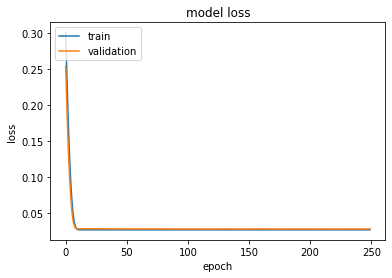

In [10]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [11]:
Xnew = np.array([[2020]])
Xnew= scaler_x.transform(Xnew)
ynew= model.predict(Xnew)
#invert normalize
ynew = scaler_y.inverse_transform(ynew) 
Xnew = scaler_x.inverse_transform(Xnew)
print("X=%s, Predicted=%s" % (Xnew[0], ynew[0]))

X=[2020.], Predicted=[25.432882]
